## <font color='black'> Projeto 3 - Predição de sucesso de filmes </font>

#### Integrantes:
Hugo Gonçalves Rocha <br/>
Alfredo Acerbi


  #### Objetivo

O objetivo do projeto é criar um programa que preveja a nota de um filme a partir de seu elenco e equipe de produção, utilizando como recurso um classificador bayesiano. Inicialmente, utilizando uma base de dados que possui diversos filmes, seus elencos, suas equipes e suas notas, separa-se os filmes entre categorias, de acordo com as notas recebidas. A partir disso, analisa-se as participações dos atores, dos diretores, dos roteiristas e dos produtores em filmes de cada categoria, e compara-se as probabilidades dos mesmos aparecerem em cada intervalo de nota. Por exemplo, tendo em vista que determinado ator aparece muito em filmes com média 6,0, é provável que no futuro os filmes em que ele participe obtenham nota 6,0. <br/>

Entretanto, o elenco não terá o mesmo peso na média que a equipe de produção. Um filme com elenco mediano e bom diretor/roteirista/produtor provavelmente será melhor do que um filme com elenco forte e direção ruim. Portanto, ao calcularmos as médias finais, consideraremos que a equipe de produção possui um peso de 65% da média, e o elenco terá peso de 35%.


In [1]:
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
# Abre os databases
dados_filme = pd.read_csv('tmdb_5000_movies.csv')
dados_creditos = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
# Seleciona as variáveis de interesse para o classificador (média de nota, elenco, equipe e número de votos)
titulo = dados_filme['title']
nota = dados_filme['vote_average']
elenco = dados_creditos['cast']
equipe = dados_creditos['crew']
votos = dados_filme['vote_count']

# Junta as colunas de interesse.
dados = pd.concat([titulo,elenco,equipe,nota,votos], axis=1)

# Seleciona somente os filmes que tiveram mais de 100 votos para computar a média. 
dados = dados[dados['vote_count']>=100]

# Os membros da equipe que serão levados em consideração são: Diretor, Produtor e Roteirista.
dados = pd.concat([dados['title'],dados['cast'],dados['crew'],dados['vote_average']],axis=1)
dados.columns = ['Título','Elenco','Equipe','Nota']
dados_treinamento = dados.head(3000)

#Cria as categorias de nota que serão utilizadas no classificador.
filmes_3 = dados_treinamento.loc[(dados.Nota<4)]
filmes_4 = dados_treinamento.loc[(dados.Nota>=4) & (dados.Nota<5)]
filmes_5 = dados_treinamento.loc[(dados.Nota>=5) & (dados.Nota<6)]
filmes_6 = dados_treinamento.loc[(dados.Nota>=6) & (dados.Nota<7)]
filmes_7 = dados_treinamento.loc[(dados.Nota>=7) & (dados.Nota<8)]
filmes_8 = dados_treinamento.loc[(dados.Nota>8)]


In [4]:
## Separa o elenco e a equipe de cada filme, de acordo com a nota que o filme recebeu. 
## Cada categoria de nota possui uma lista de equipe e de elenco, com seus integrantes.

f3_elenco = []
f3_equipe = []

for elenco in filmes_3['Elenco']:
    elenco = json.loads(elenco)
    for membro in elenco:
        f3_elenco.append(membro['name'])

for equipe in filmes_3['Equipe']:
    equipe = json.loads(equipe)
    for membro in equipe:
        if membro['job'] == 'Director':
            f3_equipe.append(membro['name'])
        if membro['job'] == 'Screenplay':
            f3_equipe.append(membro['name'])
        if membro['job'] == 'Producer':
            f3_equipe.append(membro['name'])
        
        
f4_elenco = []
f4_equipe = []

for elenco in filmes_4['Elenco']:
    elenco = json.loads(elenco)
    for membro in elenco:
        f4_elenco.append(membro['name'])

for equipe in filmes_4['Equipe']:
    equipe = json.loads(equipe)
    for membro in equipe:
        if membro['job'] == 'Director':
            f4_equipe.append(membro['name'])
        if membro['job'] == 'Screenplay':
            f4_equipe.append(membro['name'])
        if membro['job'] == 'Producer':
            f4_equipe.append(membro['name'])
            

f5_elenco = []
f5_equipe = []

for elenco in filmes_5['Elenco']:
    elenco = json.loads(elenco)
    for membro in elenco:
        f5_elenco.append(membro['name'])

for equipe in filmes_5['Equipe']:
    equipe = json.loads(equipe)
    for membro in equipe:
        if membro['job'] == 'Director':
            f5_equipe.append(membro['name'])
        if membro['job'] == 'Screenplay':
            f5_equipe.append(membro['name'])
        if membro['job'] == 'Producer':
            f5_equipe.append(membro['name'])
            

f6_elenco = []
f6_equipe = []

for elenco in filmes_6['Elenco']:
    elenco = json.loads(elenco)
    for membro in elenco:
        f6_elenco.append(membro['name'])

for equipe in filmes_6['Equipe']:
    equipe = json.loads(equipe)
    for membro in equipe:
        if membro['job'] == 'Director':
            f6_equipe.append(membro['name'])
        if membro['job'] == 'Screenplay':
            f6_equipe.append(membro['name'])
        if membro['job'] == 'Producer':
            f6_equipe.append(membro['name'])
            
            
f7_elenco = []
f7_equipe = []

for elenco in filmes_7['Elenco']:
    elenco = json.loads(elenco)
    for membro in elenco:
        f7_elenco.append(membro['name'])

for equipe in filmes_7['Equipe']:
    equipe = json.loads(equipe)
    for membro in equipe:
        if membro['job'] == 'Director':
            f7_equipe.append(membro['name'])
        if membro['job'] == 'Screenplay':
            f7_equipe.append(membro['name'])
        if membro['job'] == 'Producer':
            f7_equipe.append(membro['name'])

            
f8_elenco = []
f8_equipe = []

for elenco in filmes_8['Elenco']:
    elenco = json.loads(elenco)
    for membro in elenco:
        f8_elenco.append(membro['name'])

for equipe in filmes_8['Equipe']:
    equipe = json.loads(equipe)
    for membro in equipe:
        if membro['job'] == 'Director':
            f8_equipe.append(membro['name'])
        if membro['job'] == 'Screenplay':
            f8_equipe.append(membro['name'])
        if membro['job'] == 'Producer':
            f8_equipe.append(membro['name'])


# Conta quantas vezes cada nome aparece em cada categoria de filme. Exemplo: Leonardo DiCaprio aparece 12 vezes em filmes
# com notas >7 e <8.
# Cada categoria tem sua recorrencia de atores. 
# Além disso, a lista atores_elenco/membros_elenco guardam os nomes dos atores e dos membros do elenco sem repetição.

atores_elenco_3 = []
membros_equipe_3 = []
f3_elenco_recorrencia = dict(Counter(f3_elenco))
f3_equipe_recorrencia = dict(Counter(f3_equipe))
for membro in f3_elenco:
    if membro not in atores_elenco_3:
        atores_elenco_3.append(membro)
for membro in f3_equipe:
    if membro not in membros_equipe_3:
        membros_equipe_3.append(membro)

atores_elenco_4 = []
membros_equipe_4 = []
f4_elenco_recorrencia = dict(Counter(f4_elenco))
f4_equipe_recorrencia = dict(Counter(f4_equipe))
for membro in f4_elenco:
    if membro not in atores_elenco_4:
        atores_elenco_4.append(membro)
for membro in f4_equipe:
    if membro not in membros_equipe_4:
        membros_equipe_4.append(membro)

atores_elenco_5 = []
membros_equipe_5 = []
f5_elenco_recorrencia = dict(Counter(f5_elenco))
f5_equipe_recorrencia = dict(Counter(f5_equipe))
for membro in f5_elenco:
    if membro not in atores_elenco_5:
        atores_elenco_5.append(membro)
for membro in f5_equipe:
    if membro not in membros_equipe_5:
        membros_equipe_5.append(membro)

atores_elenco_6 = []
membros_equipe_6 = []
f6_elenco_recorrencia = dict(Counter(f6_elenco))
f6_equipe_recorrencia = dict(Counter(f6_equipe))
for membro in f6_elenco:
    if membro not in atores_elenco_6:
        atores_elenco_6.append(membro)
for membro in f6_equipe:
    if membro not in membros_equipe_6:
        membros_equipe_6.append(membro)

atores_elenco_7 = []
membros_equipe_7 = []
f7_elenco_recorrencia = dict(Counter(f7_elenco))
f7_equipe_recorrencia = dict(Counter(f7_equipe))
for membro in f7_elenco:
    if membro not in atores_elenco_7:
        atores_elenco_7.append(membro)
for membro in f7_equipe:
    if membro not in membros_equipe_7:
        membros_equipe_7.append(membro)


atores_elenco_8 = []
membros_equipe_8 = []
f8_elenco_recorrencia = dict(Counter(f8_elenco))
f8_equipe_recorrencia = dict(Counter(f8_equipe))
for membro in f8_elenco:
    if membro not in atores_elenco_8:
        atores_elenco_8.append(membro)
for membro in f8_equipe:
    if membro not in membros_equipe_8:
        membros_equipe_8.append(membro)

# Calcula o número de possibilidades de membro de equipe.
total_equipe = len(membros_equipe_3+membros_equipe_4+membros_equipe_5+membros_equipe_6+membros_equipe_7+membros_equipe_8)
# Calcula o número de possibilidades de atores.
total_elenco = len(atores_elenco_3+atores_elenco_4+atores_elenco_5+atores_elenco_6+atores_elenco_7+atores_elenco_8)

In [5]:
# Testa qual a probabilidade de cada ator/membro da equipe aparecer na produção de filmes de cada categoria.
dic_elenco_3 = {}
dic_equipe_3 = {}
for nome in f3_elenco:
    p = (f3_elenco_recorrencia[nome]+1)/(total_elenco)
    dic_elenco_3[nome]=p
for nome in f3_equipe:
    p = (f3_equipe_recorrencia[nome]+1)/(total_equipe)
    dic_equipe_3[nome]=p
    
dic_elenco_4 = {}
dic_equipe_4 = {}
for nome in f4_elenco:
    p = (f4_elenco_recorrencia[nome]+1)/(total_elenco)
    dic_elenco_4[nome]=p
for nome in f4_equipe:
    p = (f4_equipe_recorrencia[nome]+1)/(total_equipe)
    dic_equipe_4[nome]=p
    
dic_elenco_5 = {}
dic_equipe_5 = {}
for nome in f5_elenco:
    p = (f5_elenco_recorrencia[nome]+1)/(total_elenco)
    dic_elenco_5[nome]=p
for nome in f5_equipe:
    p = (f5_equipe_recorrencia[nome]+1)/(total_equipe)
    dic_equipe_5[nome]=p
    
dic_elenco_6 = {}
dic_equipe_6 = {}
for nome in f6_elenco:
    p = (f6_elenco_recorrencia[nome]+1)/(total_elenco)
    dic_elenco_6[nome]=p
for nome in f6_equipe:
    p = (f6_equipe_recorrencia[nome]+1)/(total_equipe)
    dic_equipe_6[nome]=p
    
dic_elenco_7 = {}
dic_equipe_7 = {}
for nome in f7_elenco:
    p = (f7_elenco_recorrencia[nome]+1)/(total_elenco)
    dic_elenco_7[nome]=p
for nome in f7_equipe:
    p = (f7_equipe_recorrencia[nome]+1)/(total_equipe)
    dic_equipe_7[nome]=p

dic_elenco_8 = {}
dic_equipe_8 = {}
for nome in f8_elenco:
    p = (f8_elenco_recorrencia[nome]+1)/(total_elenco)
    dic_elenco_8[nome]=p
for nome in f8_equipe:
    p = (f8_equipe_recorrencia[nome]+1)/(total_equipe)
    dic_equipe_8[nome]=p

In [6]:
# Listas com todos os nomes possíveis de atores/equipe.
membros_elenco_total = atores_elenco_3+atores_elenco_4+atores_elenco_5+atores_elenco_6+atores_elenco_7+atores_elenco_8
membros_equipe_total = membros_equipe_3+membros_equipe_4+membros_equipe_5+membros_equipe_6+membros_equipe_7+membros_equipe_8

# Adiciona os dicionários de elenco em uma lista.
lista_elenco = []
lista_elenco.append(dic_elenco_3)
lista_elenco.append(dic_elenco_4)
lista_elenco.append(dic_elenco_5)
lista_elenco.append(dic_elenco_6)
lista_elenco.append(dic_elenco_7)
lista_elenco.append(dic_elenco_8)

# Adiciona os dicionários de equipe em uma lista.
lista_equipe = []
lista_equipe.append(dic_equipe_3)
lista_equipe.append(dic_equipe_4)
lista_equipe.append(dic_equipe_5)
lista_equipe.append(dic_equipe_6)
lista_equipe.append(dic_equipe_7)
lista_equipe.append(dic_equipe_8)

In [7]:
## Função que verifica em qual categoria é mais provável que cada ator apareça, e lhe atribui uma 'nota média'.

def calcula_maior_prob_elenco(nome):
    lista = []
    for dic in lista_elenco:
        for ator in dic:
            if ator == nome:
                lista.append(dic[nome])
    if (len(lista)>=1):
        nota_maior = max(lista)
        return nota_maior
    return 0

dic_elenco_media = {}
for nome in membros_elenco_total:
    x = calcula_maior_prob_elenco(nome)
    if nome in dic_elenco_3:
        if x == dic_elenco_3[nome]:
            dic_elenco_media[nome] = 3.5
    if nome in dic_elenco_4:
        if x == dic_elenco_4[nome]:
            dic_elenco_media[nome] = 4.5
    if nome in dic_elenco_5:
        if x == dic_elenco_5[nome]:
            dic_elenco_media[nome] = 5.5
    if nome in dic_elenco_6:
        if x == dic_elenco_6[nome]:
            dic_elenco_media[nome] = 6.5
    if nome in dic_elenco_7:
        if x == dic_elenco_7[nome]:
            dic_elenco_media[nome] = 7.5
    if nome in dic_elenco_8:
        if x == dic_elenco_8[nome]:
            dic_elenco_media[nome] = 8.5

In [8]:
## Função que verifica em qual categoria é mais provável que cada ator apareça, e lhe atribui uma 'nota média'.

def calcula_maior_prob_equipe(nome):
    lista = []
    for dic in lista_equipe:
        for membro in dic:
            if membro == nome:
                lista.append(dic[membro])
    if (len(lista)>=1):
        nota_maior = max(lista)
        return nota_maior
    return 0

dic_equipe_media = {}
for nome in membros_equipe_total:
    x = calcula_maior_prob_equipe(nome)
    if nome in dic_equipe_3:
        if x == dic_equipe_3[nome]:
            dic_equipe_media[nome] = 3.5
    if nome in dic_equipe_4:
        if x == dic_equipe_4[nome]:
            dic_equipe_media[nome] = 4.5
    if nome in dic_equipe_5:
        if x == dic_equipe_5[nome]:
            dic_equipe_media[nome] = 5.5
    if nome in dic_equipe_6:
        if x == dic_equipe_6[nome]:
            dic_equipe_media[nome] = 6.5
    if nome in dic_equipe_7:
        if x == dic_equipe_7[nome]:
            dic_equipe_media[nome] = 7.5
    if nome in dic_equipe_8:
        if x == dic_equipe_8[nome]:
            dic_equipe_media[nome] = 9


In [23]:
### E finalmente, a função que classifica de acordo com as médias de cada membro no elenco e na equipe.

def Predição_de_sucesso(lista):
    soma_elenco = 0
    soma1 = 0
    soma_equipe = 0
    soma2 = 0
    titulo = ''
    
    for membro in lista:
        for funcao in membro:
            if funcao == 'Ator' or funcao == 'Atriz':
                soma_elenco = soma_elenco
                soma1 = soma1
                if membro[funcao] in dic_elenco_media:
                    soma_elenco = soma_elenco + dic_elenco_media[membro[funcao]]
                    soma1 = soma1 + 1
            if funcao == 'Diretor' or funcao == 'Roteirista' or funcao == 'Produtor':
                soma = soma_equipe
                soma2 = soma2
                if membro[funcao] in dic_equipe_media:
                    soma_equipe = soma_equipe + dic_equipe_media[membro[funcao]]
                    soma2 = soma2 + 1

        try:
            titulo = membro['Título']
        except KeyError:
            pass
        
    nota_final = 0
    
    if soma1 > 0 and soma_elenco > 0:
        nota_elenco = soma_elenco/soma1
    else:
        nota_elenco = 0
        
    if soma2 > 0 and soma_equipe > 0:
        nota_equipe = soma_equipe/soma2
    
    else:
        nota_equipe = 0
    
        
    if nota_elenco != 0 and nota_equipe !=0: 
        # A equipe tem um peso de 65% na classificação, o elenco 35%. Um filme com atores fracos porém com direção
        # forte tem mais chances de ser bom que do um filme com bons atores, porém com direção fraca.
        nota_final = nota_elenco*0.35 + nota_equipe*0.65
   
    if nota_elenco == 0 and nota_equipe != 0:
        nota_final = nota_equipe
    
    if nota_elenco != 0 and nota_equipe == 0:
        nota_final = nota_elenco
    
    nota_final = round(nota_final,1)
    
    
    if nota_final <5:
        status = 'Que pena! Talvez o filme não seja muito bom...'
    if nota_final >= 5 and nota_final <= 6.9:
        status = 'Pelo visto, o filme é mediano.'
    if nota_final >=7:
        status = 'Uau! Esse filme provavelmente é muito bom!'
        
    #if titulo != 0:
    #    return(print("A nota prevista do filme '",titulo,"' é",nota_final,'.',status))
    #if titulo == 0:
    #    return(print('A nota prevista do filme é',nota_final,'.',status))
    
    return(nota_final)

In [24]:
## Dataframe comparativo entre as notas reais e as notas calculadas pelo programa.

dados_teste = dados.tail(162)

notas = []
lista = []
for i in range(0,162):
    filme = dados_teste.iloc[i]
    lista_elenco_equipe = []
    elenco = filme['Elenco']
    elenco = json.loads(elenco)
    for ator in elenco:
        dic_ator = {}
        dic_ator['Ator'] = ator['name']
        lista_elenco_equipe.append(dic_ator)
        
    equipe = filme['Equipe']
    equipe = json.loads(equipe)
    for membro in equipe:
        dic_equipe = {}
        if membro['job'] == 'Director':
            dic_equipe['Diretor'] = membro['name']
        else: 
            pass
        if membro['job'] == 'Screenplay':
            dic_equipe['Roteirista'] = membro['name']
        else: 
            pass
        if membro['job'] == 'Producer':
            dic_equipe['Produtor'] = membro['name']
        else: 
            pass
        lista_elenco_equipe.append(dic_equipe)
    dic_titulo = {}    
    dic_titulo['Título'] = filme['Título']
    lista_elenco_equipe.append(dic_titulo)
    
    lista.append(lista_elenco_equipe)
     
        
for i in lista:
    a = Predição_de_sucesso(i)
    notas.append(a)

dados_teste = dados_teste.reset_index(drop=True)
notas = pd.Series(notas)

d = pd.concat([dados_teste,notas],axis=1)
d.columns = ['Título','Elenco','Equipe','Nota real','Nota prevista']

# Calcula a diferença entre a nota real e a nota dada pelo classificador
lista_delta = []
for i in range(0,162):
    delta = d['Nota real'][i] - d['Nota prevista'][i] 
    lista_delta.append(delta)

delta = pd.Series(lista_delta) 

d = pd.concat([d,delta],axis=1)
d.columns = ['Título','Elenco','Equipe','Nota real','Nota prevista','Nota real - Nota prevista']
d

,Título,Elenco,Equipe,Nota real,Nota prevista,Nota real - Nota prevista
0,Nowhere Boy,"[{""cast_id"": 1, ""character"": ""John Lennon"", ""c...","[{""credit_id"": ""59486b2cc3a36811150348b2"", ""de...",7.2,6.3,0.9
1,A Streetcar Named Desire,"[{""cast_id"": 13, ""character"": ""Blanche DuBois""...","[{""credit_id"": ""52fe426dc3a36847f801dac1"", ""de...",7.6,7.4,0.2
2,Dr. Strangelove or: How I Learned to Stop Worr...,"[{""cast_id"": 13, ""character"": ""Group Capt. Lio...","[{""credit_id"": ""52fe4290c3a36847f802879d"", ""de...",8.0,7.2,0.8
3,Beasts of the Southern Wild,"[{""cast_id"": 7, ""character"": ""Hushpuppy"", ""cre...","[{""credit_id"": ""577ef3f59251413b6f0006eb"", ""de...",6.8,7.5,-0.7
4,Battle for the Planet of the Apes,"[{""cast_id"": 11, ""character"": ""Caesar"", ""credi...","[{""credit_id"": ""52fe430ec3a36847f8037183"", ""de...",5.5,6.6,-1.1
5,Hang 'em High,"[{""cast_id"": 1, ""character"": ""Marshal Jed Coop...","[{""credit_id"": ""52fe43e4c3a36847f80768d9"", ""de...",6.7,6.7,0.0
6,Run Lola Run,"[{""cast_id"": 11, ""character"": ""Lola"", ""credit_...","[{""credit_id"": ""569edf60925141370b000700"", ""de...",7.2,7.0,0.2
7,May,"[{""cast_id"": 1, ""character"": ""May Dove Canady""...","[{""credit_id"": ""52fe43cb9251416c7501e649"", ""de...",6.3,6.7,-0.4
8,Conquest of the Planet of the Apes,"[{""cast_id"": 8, ""character"": ""Caesar"", ""credit...","[{""credit_id"": ""52fe430cc3a36847f80368f3"", ""de...",6.1,6.6,-0.5
9,I Spit on Your Grave,"[{""cast_id"": 2, ""character"": ""Jennifer Hills"",...","[{""credit_id"": ""52fe466dc3a36847f80fe6cb"", ""de...",6.3,6.7,-0.4


In [25]:
# Describe das diferenças entre nota real e nota calculada pelo classificador.
pd.DataFrame(delta.describe())

,0
count,162.000000
mean,0.293210
std,1.598218
min,-2.300000
25%,-0.500000
50%,0.100000
75%,0.500000
max,7.800000


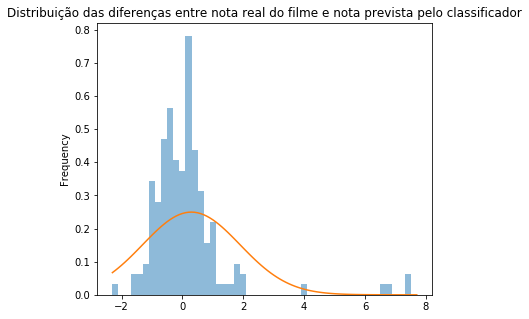

In [26]:
# Gráficos das diferenças entre as notas reais e as notas computadas pelo classificador.

faixa = np.arange(delta.min(),delta.max(),0.2)

delta.plot.hist(bins=faixa, title='Distribuição das diferenças entre nota real do filme e nota prevista pelo classificador', figsize=(6,5), normed = True, alpha=0.5)

mu = delta.mean()
sigma = delta.std()

loc = mu
scale = sigma

x = np.arange(delta.min(), delta.max(), 0.1)
plt.plot(x, norm.pdf(x, loc, scale))
plt.show()

# Conclusões

Observando-se o gráfico acima, repara-se que a maior parte dos deltas entre a nota real e a nota dada pelo classificador encontra-se em torno do zero. Portanto, o classificador é razoavelmente confiável. Entretanto, alguns pontos merecem atenção.<br/>

Primeiramente, o desvio padrão dos deltas é consideravelmente grande, e isso se deve ao fato de que alguns diretores e atores cujos filmes estão nos dados de teste não apareceram nos dados de treinamento, e portanto, o classificador atribui ao filme a nota 0, por falta de dados para imputar uma nota mais exata. Logo, o delta em módulo será a nota real do filme, que irá confundir o cálculo do desvio padrão. Isso pode ser resolvido ao aumentar a base de dados de treinamento.<br/>

Além disso, é importante considerar que o classificador é um previsor; e, portanto, pode apresentar erros maiores ao atribuir notas a filmes mais antigos. Isso se deve ao fato de que o classificador considera todos os filmes feitos por cada indivíduo até 2015. Nos casos de filmes antigos, seus participantes já fizeram outras produções, o que afeta a classificação. No caso de filmes razoavelmente antigos e com notas altas, como "A Lista de Schindler", de 1993, cuja nota no database é 8.3, tanto os atores quanto a produção participaram de filmes medianos, como, no caso citado, a participação de Ben Kingsley em "Homem de Ferro 3", de 2013, e a de Liam Neeson em "Sem Escalas", de 2014, ambos com nota 6.8 no database utilizado. Desta forma, se utilizado para classificar "A Lista de Schindler", certamente o programa dará uma nota bem abaixo da real. 

Por outro lado, filmes mais recentes são classificados com maior exatidão, justamente pelo programa considerar trabalhos recentes. Em testes realizados, filmes como "A Origem", de 2010, "Interestelar, de 2014 e a animação "Detona Ralph", de 2012, obtiveram, respectivamente, as notas 8,2, 8,1 e 7,2, sendo 8,1, 8,1 e 7.1 suas notas reais. <br/>

Embora o processo de classificação esteja pronto e rodando, ainda há uma série de melhorias a serem feitas antes de oferecer o programa a um usuário. Primeiramente, o função que prevê a nota de filme recebe uma lista de dicionários contendo os nomes e a função de cada membro da equipe/elenco. Para alguém que não esteja famialirizado com linguagem de programação, criar tal lista pode ser complicado. A solução idealmente é criar uma interface simples, talvez até em Tkinter, para facilitar a interação do usuário. Nela, o mesmo insere o nome dos membros do filme em um campo de entrada, e o programa internamente roda a função. Assim, qualquer usuário poderá utilizar o programa sem maiores dificuldades.